In [1]:
import h5py
import sys
import os
sys.path.append('../src')
import localmodule
import librosa.display
import matplotlib
from matplotlib import pyplot as plt
from librosa.display import specshow
import numpy as np

%matplotlib inline
data_dir = localmodule.get_data_dir()
from matplotlib import pyplot as plt
logmelspec_dir = os.path.join(data_dir, 'BirdVox-70k_hdf5')
original_dir = os.path.join(logmelspec_dir, 'original')
hdf5_path = os.path.join(original_dir, 'BirdVox-70k_original_unit01.hdf5')
hdf5_file = h5py.File(hdf5_path)

hdf5_waveforms = hdf5_file["waveforms"]
hdf5_keys = list(hdf5_waveforms.keys())
positive_keys = [x for x in hdf5_keys if x.split("_")[-2] == "1"]
negative_keys = [x for x in hdf5_keys if x.split("_")[-2] == "1"]

TypeError: __init__() got an unexpected keyword argument 'unit'

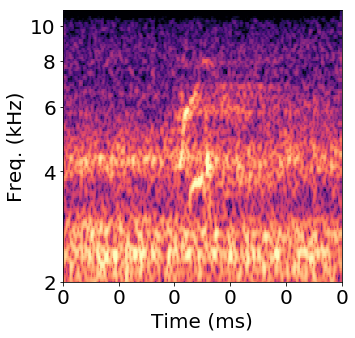

In [10]:
min_db = 130
max_db = 180
sample_rate = 24000

for i in range(3):
    key = positive_keys[i]
    chunk_waveform = hdf5_waveforms[key][:]
    chunk_waveform = chunk_waveform * (2**32)
    logmelspec_settings = localmodule.get_logmelspec_settings()
    pcen_settings = localmodule.get_pcen_settings()
    chunk_waveform = librosa.resample(
        chunk_waveform, sample_rate, logmelspec_settings["sr"])
    snippet_duration = len(chunk_waveform) / logmelspec_settings["sr"]

    stft = librosa.stft(
        chunk_waveform,
        n_fft=logmelspec_settings["n_fft"],
        win_length=logmelspec_settings["win_length"],
        hop_length=logmelspec_settings["hop_length"],
        window=logmelspec_settings["window"])

    # Delete last sample to compensate for padding.
    stft = stft[:, :-1]

    # Compute squared magnitude coefficients.
    abs2_stft = (stft.real*stft.real) + (stft.imag*stft.imag)

    # Gather frequency bins according to the Mel scale.
    melspec = librosa.feature.melspectrogram(
        y=None,
        S=abs2_stft,
        sr=logmelspec_settings["sr"],
        n_fft=logmelspec_settings["n_fft"],
        n_mels=logmelspec_settings["n_mels"],
        htk=True,
        fmin=logmelspec_settings["fmin"],
        fmax=logmelspec_settings["fmax"])
    
    fig = plt.figure(figsize=(5, 5))
    logmelspec = librosa.power_to_db(melspec)
    logmelspec = np.minimum(np.maximum(logmelspec, min_db), max_db)
    specshow(logmelspec,
        y_axis='mel', x_axis="time",
        sr=logmelspec_settings["sr"], hop_length=logmelspec_settings["hop_length"],
        fmin=logmelspec_settings["fmin"], fmax=logmelspec_settings["fmax"], cmap="magma")
    plt.xlabel("Time (ms)", fontsize=20)
    plt.ylabel("Freq. (kHz)", fontsize=20)
    plt.xticks(np.linspace(0, snippet_duration, 6))
    plt.gca().set_xticklabels(
        np.linspace(0, snippet_duration, 6).astype('int'), fontsize=20)
    plt.yticks(np.linspace(2000, 10000, 5, endpoint=True))
    plt.gca().set_yticklabels([2, 4, 6, 8, 10], fontsize=20)
    plt.minorticks_off()
    
    plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter(unit='ms'))


0.459375

In [16]:
negative_keys

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
